In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
plt.style.use('seaborn')
Data=pd.read_csv(r"/content/electricity.csv")

In [8]:
Data.head(5)

,YYYYMM,Value,Description,Unit
0,197901,94985.712,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,197902,84747.823,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,197903,85219.537,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,197904,80450.173,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,197905,86149.298,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


In [9]:
Data['YYYYMM'] = pd.to_datetime(Data['YYYYMM'], format='%Y%m', errors='coerce').dropna()

** Original time series of data **

In [10]:
Data

,YYYYMM,Value,Description,Unit
0,1979-01-01,94985.712,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
1,1979-02-01,84747.823,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
2,1979-03-01,85219.537,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
3,1979-04-01,80450.173,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
4,1979-05-01,86149.298,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
...,...,...,...,...
379,2010-08-01,177745.320,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
380,2010-09-01,148745.672,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
381,2010-10-01,132269.835,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours
382,2010-11-01,135185.045,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours


Text(0, 0.5, 'Values')

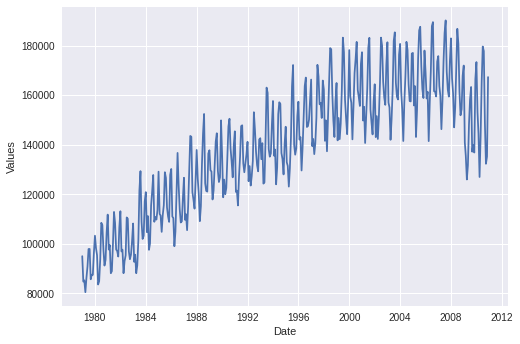

In [11]:
plt.plot(Data['YYYYMM'],Data['Value'])
plt.xlabel('Date')
plt.ylabel('Values')

**Difference_1 Data Generation**

In [12]:
Data['diff_1'] = Data['Value'].diff()
Data.head(10)

,YYYYMM,Value,Description,Unit,diff_1
0,1979-01-01,94985.712,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,NaN
1,1979-02-01,84747.823,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-10237.889
2,1979-03-01,85219.537,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,471.714
3,1979-04-01,80450.173,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-4769.364
4,1979-05-01,86149.298,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,5699.125
5,1979-06-01,90817.260,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,4667.962
6,1979-07-01,97879.473,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,7062.213
7,1979-08-01,97910.027,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,30.554
8,1979-09-01,85664.344,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-12245.683
9,1979-10-01,87527.612,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1863.268


No handles with labels found to put in legend.


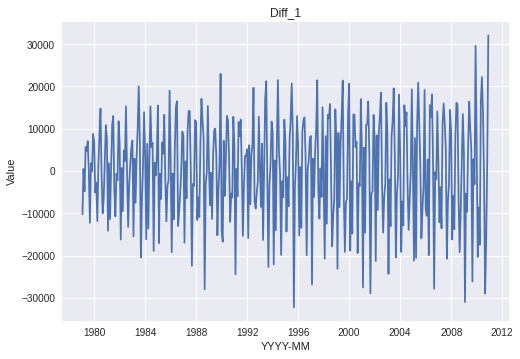

In [13]:
plt.plot(Data['YYYYMM'],Data['diff_1'])
plt.title('Diff_1')
plt.xlabel("YYYY-MM")
plt.ylabel("Value")
plt.legend()
plt.show()

**The seasonally differenced series of data**

No handles with labels found to put in legend.


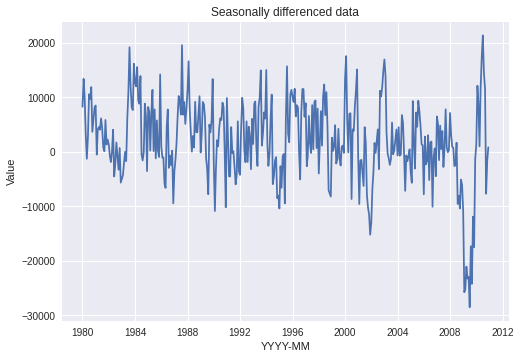

In [14]:
Data['diff_12'] = Data['Value'].diff(periods=12)
plt.plot(Data['YYYYMM'],Data['diff_12'])
plt.title('Seasonally differenced data')
plt.xlabel("YYYY-MM")
plt.ylabel("Value")
plt.legend()

No handles with labels found to put in legend.


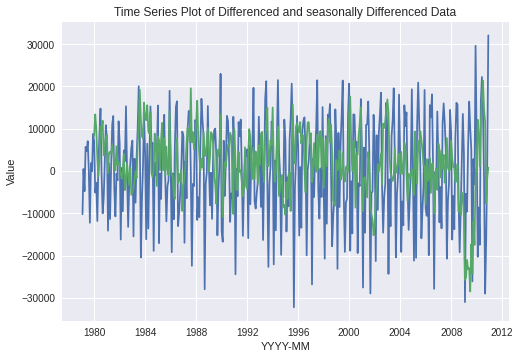

In [15]:
plt.plot(Data['YYYYMM'],Data['diff_1'])
plt.plot(Data['YYYYMM'],Data['diff_12'])
plt.title('Time Series Plot of Differenced and seasonally Differenced Data')
plt.xlabel("YYYY-MM")
plt.ylabel("Value")
plt.legend()
plt.show()

In [16]:
Data_final=Data.dropna()

In [17]:
values = Data_final["Value"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.888785
p-value: 0.337355
critical values at different levels:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [18]:
values = Data_final["diff_1"].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -5.360904
p-value: 0.000004
critical values at different levels:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

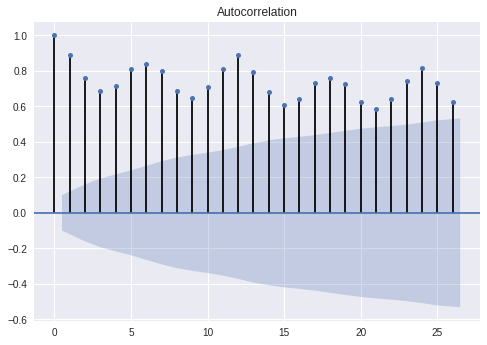

In [20]:
plot_acf(Data["Value"])
plt.show()

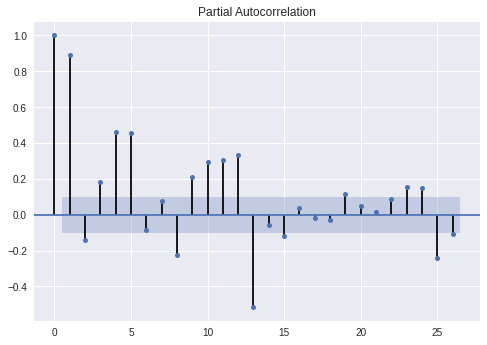

In [21]:
plot_pacf(Data["Value"])
plt.show()

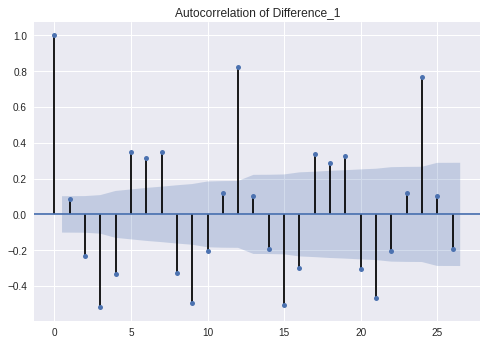

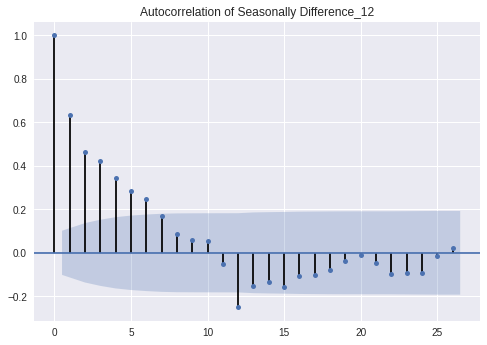

In [22]:
plot_acf(Data_final["diff_1"])
plt.title('Autocorrelation of Difference_1')
plt.show()
plot_acf(Data_final["diff_12"])
plt.title('Autocorrelation of Seasonally Difference_12')
plt.show()

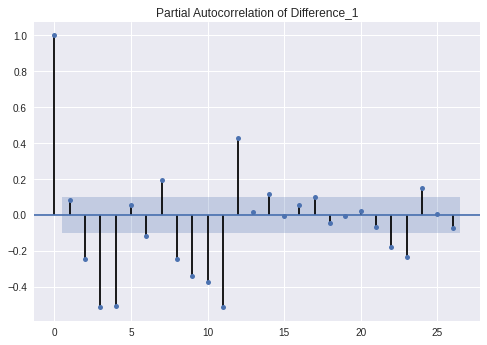

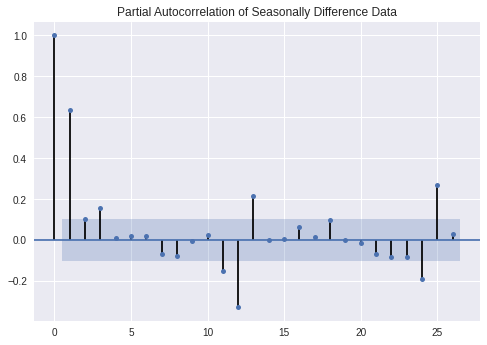

In [23]:
plot_pacf(Data_final["diff_1"])
plt.title('Partial Autocorrelation of Difference_1')
plt.show()
plot_pacf(Data_final["diff_12"])
plt.title('Partial Autocorrelation of Seasonally Difference Data')
plt.show()

In [29]:
Data_final

,YYYYMM,Value,Description,Unit,diff_1,diff_12
12,1980-01-01,103257.677,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,7027.629,8271.965
13,1980-02-01,98150.804,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-5106.873,13402.981
14,1980-03-01,95386.178,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-2764.626,10166.641
15,1980-04-01,83561.813,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-11824.365,3111.640
16,1980-05-01,84884.262,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,1322.449,-1265.036
...,...,...,...,...,...,...
379,2010-08-01,177745.320,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-1855.179,14484.837
380,2010-09-01,148745.672,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-28999.648,11601.024
381,2010-10-01,132269.835,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,-16475.837,-7685.742
382,2010-11-01,135185.045,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,2915.210,-1624.530


1.Ordinary ARMA Model

In [24]:
from statsmodels.tsa.arima_model import ARMA

In [35]:
armamodel=ARMA(Data_final['diff_1'], order=(1,1))
ArmaFit=armamodel.fit(disp=False)
predicted=ArmaFit.predict(300,400)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [36]:
predicted=pd.DataFrame(predicted)

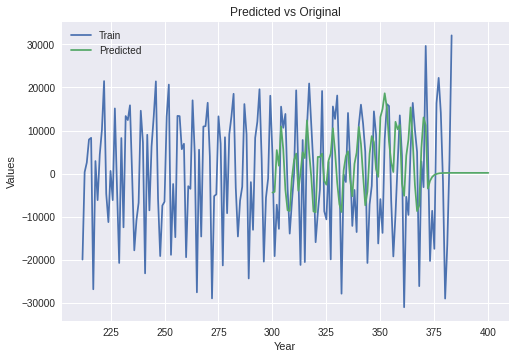

In [37]:
plt.plot(Data_final['diff_1'][200:],label='Train')
plt.plot(predicted,label='Predicted')
plt.title('Predicted vs Original')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()

In [43]:
predicted[88:]

,0
388,169.505021
389,169.541955
390,169.560781
391,169.570376
392,169.575267
393,169.577760
394,169.579031
395,169.579678
396,169.580008
397,169.580177
